##### ReadME infos about homework : 
 **Airbnb House Price Prediction Project** In this project, we will develop a machine learning model to predict the prices of houses listed on Airbnb. 
#### Data Information: 
 * **Data Set:** House listings collected from Airbnb 
 * **Variables:** Price, number of rooms, number of bathrooms, location, number of guests, number of reviews, rating, house type, etc.
#### EDA & Data Preprocessing:  
* We will explore the data and process missing data. 
*We will visualise the data and examine relationships and trends. 
* We will apply data normalisation and transformation if necessary.
#### Feature Engineering:  
* We will try to improve the performance of our model by deriving new features. 
* For example, we can add neighbourhood features using location information. 
#### Model Training:
* We will train different machine learning models and select the best performing model.
* We will optimise the model hyperparameters. 
#### Model Evaluation: 
* We will evaluate our model on test data and measure the prediction accuracy. 
* We will analyse the performance of the model using different metrics.
 
 
**Table of Content**
1. **Data Information:**
2. **EDA & Data Preprocessing:**
3. **Feature Engineering:**
4. **Model Training:**
5. **Model Evaluation:**


# Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor


# Data Information



**Additional Features**
The website data was reviewed, and additional data was included. This allowed for the extraction of extra features to be checked. The analysis showed that extra feature data was included. For more information, you can refer to this website: [https://insideairbnb.com/get-the-data](https://insideairbnb.com/get-the-data)

**Data Dict**

- 'id': Unique identifier for the listing.
- 'host_id': Unique identifier for the host.
- 'host_name': Name of the host.
- 'host_about': Description or bio of the host.
- 'host_response_time': Time taken by the host to respond to inquiries.
- 'host_response_rate': Percentage of inquiries to which the host responds.
- 'host_acceptance_rate': Percentage of booking requests accepted by the host.
- 'host_verifications': Types of verifications the host has undergone (e.g., email, phone, government ID, etc.).
- 'neighbourhood_cleansed': The neighbourhood group as geocoded using the latitude and longitude against neighborhoods.
- 'property_type': Self-selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field.
- 'room_type': The type of room available for booking.
- 'accommodates': The maximum capacity of the listing.
- 'bathrooms_text': The textual description of the number of bathrooms in the listing.
- 'beds': The number of bed(s) in the listing.
- 'price': The daily price in the local currency.
- 'number_of_reviews': The number of reviews the listing has.
- 'review_scores_rating': The overall rating score given by guests in reviews.
- 'review_scores_accuracy': The rating score for accuracy given by guests in reviews.
- 'review_scores_cleanliness': The rating score for cleanliness given by guests in reviews.
- 'review_scores_checkin': The rating score for check-in experience given by guests in reviews.
- 'review_scores_communication': The rating score for communication given by guests in reviews.
- 'review_scores_location': The rating score for location given by guests in reviews.
- 'review_scores_value': The rating score for value given by guests in reviews.

In Extra Data
- 'latitude': Uses the World Geodetic System (WGS84) projection for latitude and longitude.
- 'longitude': Uses the World Geodetic System (WGS84) projection for latitude and longitude.
- 'avaliability_365: avaliability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.



## Exploring Airbnb House Price Prediction Data

In this section, we will explore the data used for our Airbnb house price prediction project.

- The `data.head()` command shows the first 5 rows of the dataset. This allows us to see the general structure of the dataset and which columns are present.

- The `data.info()` command provides more detailed information about the dataset, including:
  - The data type of each column
  - The number of missing values in each column
  - The minimum, maximum, mean, and standard deviation of each column

- The `data.shape()` command gives the dimensions (number of rows and columns) of the dataset.


In [2]:
data = pd.read_csv("data.csv")
data.head()

,id,host_id,host_name,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_verifications,neighbourhood_cleansed,property_type,...,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,9060873,47265643,Magali,NaN,NaN,NaN,86%,"['email', 'phone']",Oud-Oost,Entire condo,...,1.0,$232.00,5,4.60,4.60,4.40,4.40,4.60,4.60,4.40
1,1427610,7677579,Aukje,Hi! I am Aukje. I live with my husband and two...,NaN,NaN,50%,"['email', 'phone']",Geuzenveld - Slotermeer,Entire home,...,2.0,$120.00,6,5.00,4.67,4.83,4.83,5.00,4.67,4.83
2,4829273,15049236,Franz,I've been told to be a friendly and social per...,within a few hours,100%,83%,"['email', 'phone', 'work_email']",Oostelijk Havengebied - Indische Buurt,Entire rental unit,...,2.0,$170.00,51,4.71,4.80,4.65,4.87,4.96,4.57,4.57
3,3237893,16382847,Vieve,NaN,within a day,70%,18%,"['email', 'phone']",De Pijp - Rivierenbuurt,Entire rental unit,...,NaN,$200.00,43,4.86,4.95,4.93,4.95,4.98,5.00,4.84
4,864176551965684805,508937163,Saeed,NaN,a few days or more,0%,60%,"['email', 'phone']",Oostelijk Havengebied - Indische Buurt,Entire home,...,2.0,$265.00,5,5.00,5.00,5.00,5.00,5.00,5.00,4.40


In [3]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8739 non-null   int64  
 1   host_id                      8739 non-null   int64  
 2   host_name                    8739 non-null   object 
 3   host_about                   4707 non-null   object 
 4   host_response_time           5679 non-null   object 
 5   host_response_rate           5679 non-null   object 
 6   host_acceptance_rate         7377 non-null   object 
 7   host_verifications           8739 non-null   object 
 8   neighbourhood_cleansed       8739 non-null   object 
 9   property_type                8739 non-null   object 
 10  room_type                    8739 non-null   object 
 11  accommodates                 8739 non-null   int64  
 12  bathrooms_text               8730 non-null   object 
 13  beds              

(8739, 23)

In [4]:
data.describe()

,id,host_id,accommodates,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,8.739000e+03,8.739000e+03,8739.000000,8665.000000,8739.000000,7825.000000,7825.00000,7824.000000,7825.000000,7825.000000,7824.000000,7824.000000
mean,3.448635e+17,1.095547e+08,2.902392,1.816503,45.042453,4.837604,4.85244,4.771869,4.885461,4.903413,4.798282,4.646130
std,4.181954e+17,1.473164e+08,1.341186,1.431018,110.191857,0.245794,0.24116,0.318695,0.225793,0.215054,0.255773,0.322764
min,2.818000e+03,3.159000e+03,1.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.957993e+07,1.058756e+07,2.000000,1.000000,3.000000,4.770000,4.80000,4.670000,4.850000,4.890000,4.690000,4.500000
50%,4.553979e+07,3.725295e+07,2.000000,1.000000,9.000000,4.910000,4.92000,4.870000,4.960000,5.000000,4.870000,4.690000
75%,7.911577e+17,1.454343e+08,4.000000,2.000000,35.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.840000
max,1.043564e+18,5.503263e+08,16.000000,33.000000,3528.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
extra_data = pd.read_csv("listings.csv")
extra_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.90 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3,365,2023-11-27,2.04,1,0,51,0363 5F3A 5684 6750 D14D
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,117.0,1,366,2023-12-10,2.18,2,168,30,0363 CBB3 2C10 0C2A 1E29
2,27886,Houseboat in Amsterdam · ★4.93 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,155.0,3,267,2023-11-19,1.84,1,175,24,0363 974D 4986 7411 88D8
3,28871,Rental unit in Amsterdam · ★4.87 · 1 bedroom ·...,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,79.0,2,569,2023-12-10,3.51,2,0,116,0363 607B EA74 0BD8 2F6F
4,29051,Rental unit in Amsterdam · ★4.81 · 1 bedroom ·...,124245,Edwin,NaN,Centrum-Oost,52.36584,4.89111,Private room,59.0,2,698,2023-12-08,4.50,2,91,97,0363 607B EA74 0BD8 2F6F


In [6]:
extra_data.info()
extra_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8739 entries, 0 to 8738
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8739 non-null   int64  
 1   name                            8739 non-null   object 
 2   host_id                         8739 non-null   int64  
 3   host_name                       8739 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   8739 non-null   object 
 6   latitude                        8739 non-null   float64
 7   longitude                       8739 non-null   float64
 8   room_type                       8739 non-null   object 
 9   price                           8443 non-null   float64
 10  minimum_nights                  8739 non-null   int64  
 11  number_of_reviews               8739 non-null   int64  
 12  last_review                     78

(8739, 18)

# EDA & Data Prepocessing

## Data Processing and Feature Selection

First, we drop non-numerical ('object' dtype) columns as they may not be directly useful for price prediction.

Next, we calculate the correlations between the remaining columns and visualize a correlation matrix. We will focus on features that show high correlation with the price.

Based on the correlation matrix and domain expertise, we select a subset of features that could be useful. In the example, the following features are selected:
- `latitude`: Latitude - location information
- `longitude`: Longitude - location information
- `availability_365`: Availability of listings throughout the year

### Merging Datasets

Now we can merge our main dataset (`data`) with this selected extra data (`extra`). This is usually done via a common column (e.g., listing ID) using 'join'-like functions.


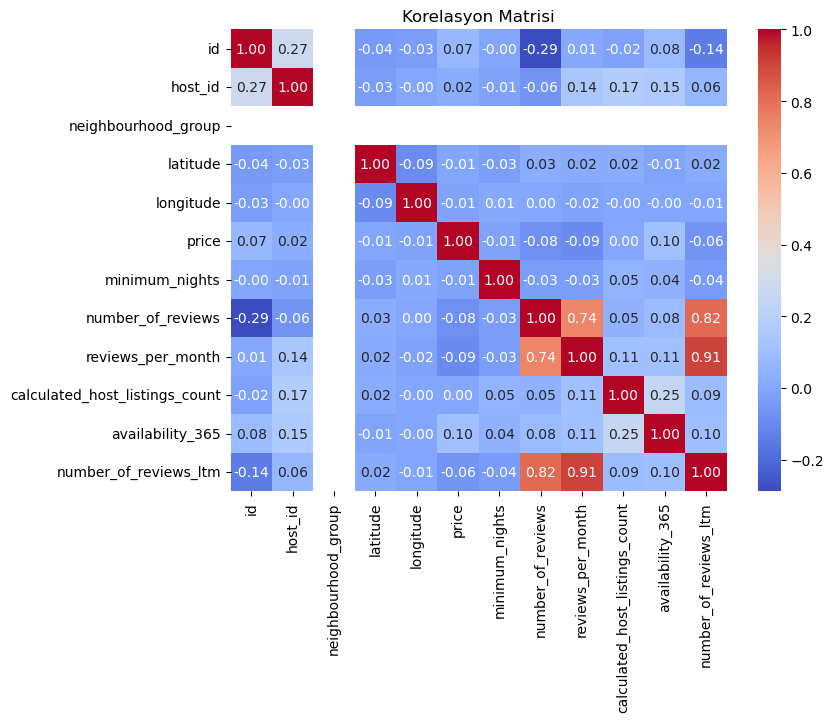

In [7]:

#First, we drop non-numerical ('object' dtype) columns. These columns may not be directly useful for price prediction.
object_columns = extra_data.select_dtypes(include=["object"]).columns
extra_data = extra_data.drop(columns=object_columns)
corr_matrix = extra_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [8]:
#could be useful feature
extra = extra_data[['latitude', 'longitude', 'availability_365']]
extra

,latitude,longitude,availability_365
0,52.364350,4.943580,0
1,52.364070,4.893930,168
2,52.387610,4.891880,175
3,52.367750,4.890920,0
4,52.365840,4.891110,91
...,...,...,...
8734,52.358661,4.907734,15
8735,52.356170,4.841293,16
8736,52.365377,4.926885,263
8737,52.356602,4.876534,232


In [9]:
index = [
    "latitude", "longitude", "availability_365"]
for column in index:
    print(extra[column].value_counts(), "\n---------------------------------------------------------------")


latitude
52.388100    12
52.373920    11
52.339954    11
52.374259    10
52.364300    10
             ..
52.388460     1
52.398670     1
52.372500     1
52.404760     1
52.377550     1
Name: count, Length: 6259, dtype: int64 
---------------------------------------------------------------
longitude
4.914380    13
4.896350    11
4.924154    11
4.888670    10
4.899258    10
            ..
4.848477     1
4.998080     1
4.848790     1
4.932963     1
4.843990     1
Name: count, Length: 7232, dtype: int64 
---------------------------------------------------------------
availability_365
0      3184
8        97
7        94
4        91
5        89
       ... 
205       2
305       2
304       2
236       1
286       1
Name: count, Length: 365, dtype: int64 
---------------------------------------------------------------


availability_365  is looking more useful.

##### Data Cleaning and Preprocessing

The purpose of the code is to clean and preprocess specific columns in a dataset (`data`) using regular expressions (`re` module) and lambda functions. It performs the following operations:

- Extracts the numerical value from the "bathrooms_text" column and assigns it to the same column.
- Converts the "price" column values to float by removing dollar signs, commas, and whitespace.
- Converts the "host_response_rate" column values to float by removing percentage signs, commas, and whitespace.
- Converts the "host_acceptance_rate" column values to float by removing percentage signs, commas, and whitespace.


In [10]:
import re
data["bathrooms_text"] = data["bathrooms_text"].apply(lambda text: re.findall(r'\d+', str(text))[0] if len(re.findall(r'\d+', str(text))) else None)
data["price"] = data["price"].apply(lambda text: float(str(text).replace("$","").replace(",","").strip()))
data["host_response_rate"] = data["host_response_rate"].apply(lambda text: float(str(text).replace("%","").replace(",","").strip()))
data["host_acceptance_rate"] = data["host_acceptance_rate"].apply(lambda text: float(str(text).replace("%","").replace(",","").strip()))

In [11]:
df = pd.DataFrame(data = data)
df["availability_365"] = extra_data["availability_365"]
df.head()

,id,host_id,host_name,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_verifications,neighbourhood_cleansed,property_type,...,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_365
0,9060873,47265643,Magali,NaN,NaN,NaN,86.0,"['email', 'phone']",Oud-Oost,Entire condo,...,232.0,5,4.60,4.60,4.40,4.40,4.60,4.60,4.40,0
1,1427610,7677579,Aukje,Hi! I am Aukje. I live with my husband and two...,NaN,NaN,50.0,"['email', 'phone']",Geuzenveld - Slotermeer,Entire home,...,120.0,6,5.00,4.67,4.83,4.83,5.00,4.67,4.83,168
2,4829273,15049236,Franz,I've been told to be a friendly and social per...,within a few hours,100.0,83.0,"['email', 'phone', 'work_email']",Oostelijk Havengebied - Indische Buurt,Entire rental unit,...,170.0,51,4.71,4.80,4.65,4.87,4.96,4.57,4.57,175
3,3237893,16382847,Vieve,NaN,within a day,70.0,18.0,"['email', 'phone']",De Pijp - Rivierenbuurt,Entire rental unit,...,200.0,43,4.86,4.95,4.93,4.95,4.98,5.00,4.84,0
4,864176551965684805,508937163,Saeed,NaN,a few days or more,0.0,60.0,"['email', 'phone']",Oostelijk Havengebied - Indische Buurt,Entire home,...,265.0,5,5.00,5.00,5.00,5.00,5.00,5.00,4.40,91


In [12]:
df.dtypes

id                               int64
host_id                          int64
host_name                       object
host_about                      object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_verifications              object
neighbourhood_cleansed          object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms_text                  object
beds                           float64
price                          float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
availability_365                 int64
dtype: object

price
200.0     358
250.0     332
300.0     270
150.0     260
350.0     181
         ... 
2430.0      1
542.0       1
957.0       1
640.0       1
940.0       1
Name: count, Length: 613, dtype: int64


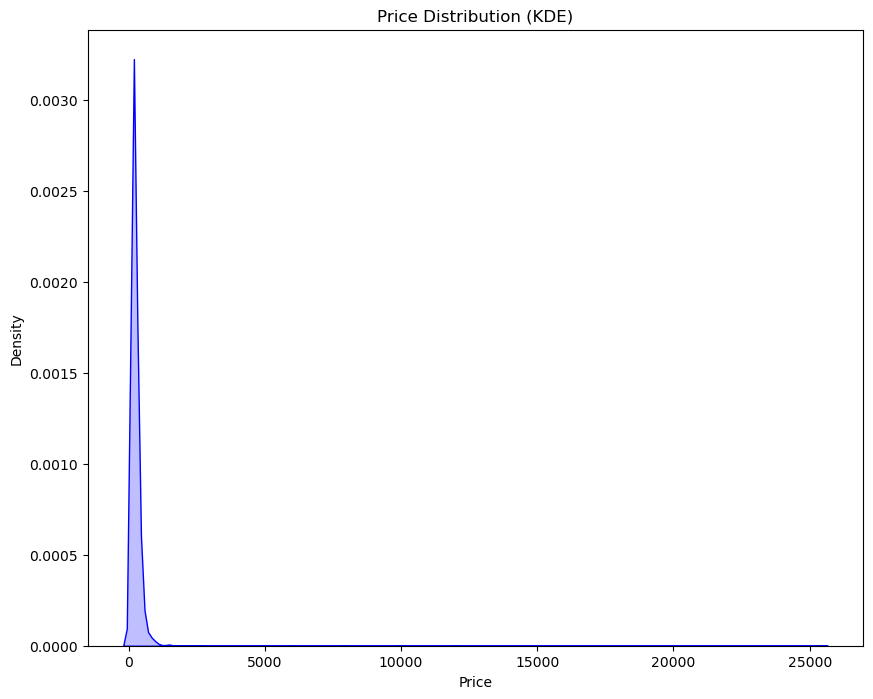

In [13]:
#Distirbution of Price

print(df["price"].value_counts())
plt.figure(figsize=(10, 8))
sns.kdeplot(df["price"], fill=True, color="b")
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution (KDE)')
plt.show()


#### Numerical Features

In [14]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

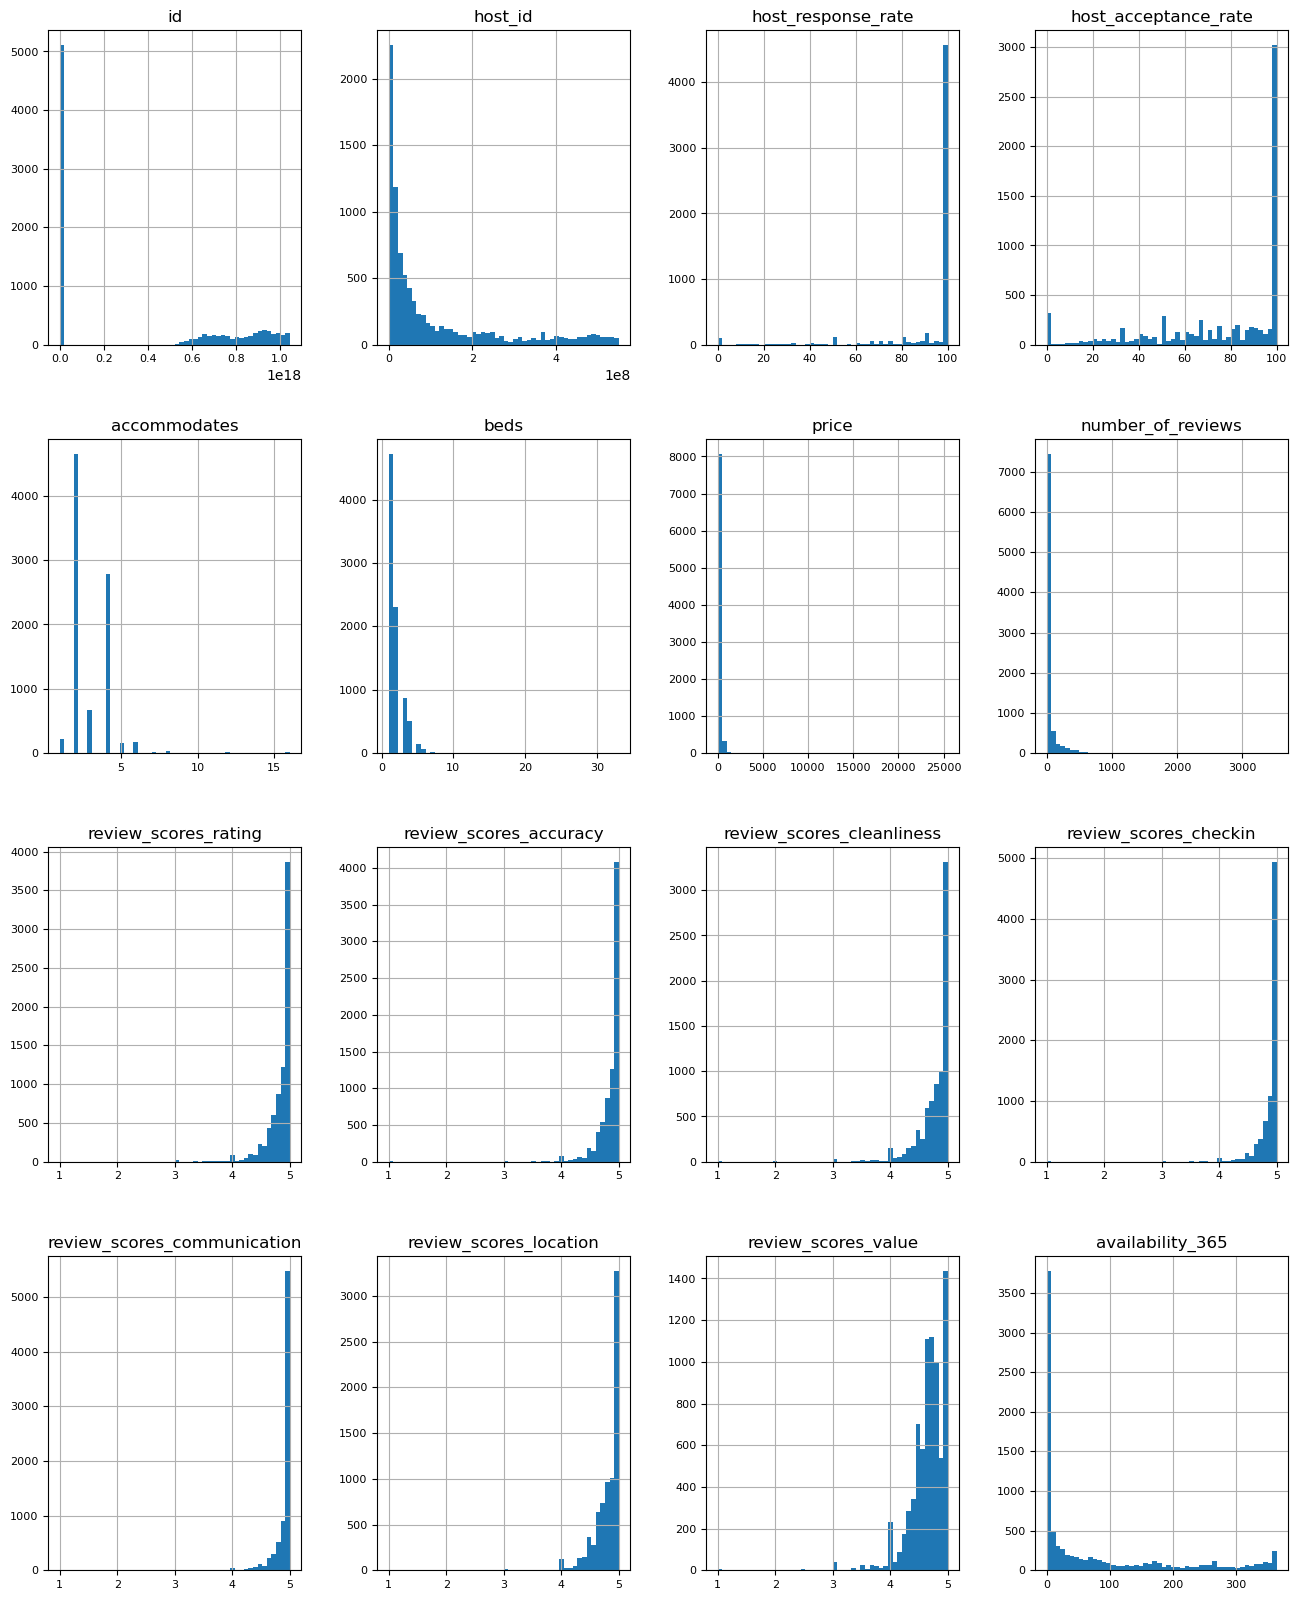

In [15]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [16]:

## Numerical variables are usually of 2 type
## Continous variable and Discrete Variables

discrete_feature=[feature for feature in df_num if len(df[feature].unique())<25 ]
print(discrete_feature)
print("Discrete Variables Count: {}".format(len(discrete_feature)))

['accommodates', 'beds']
Discrete Variables Count: 2


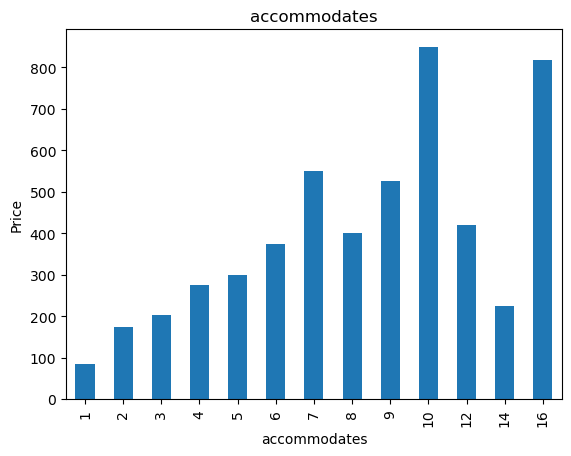

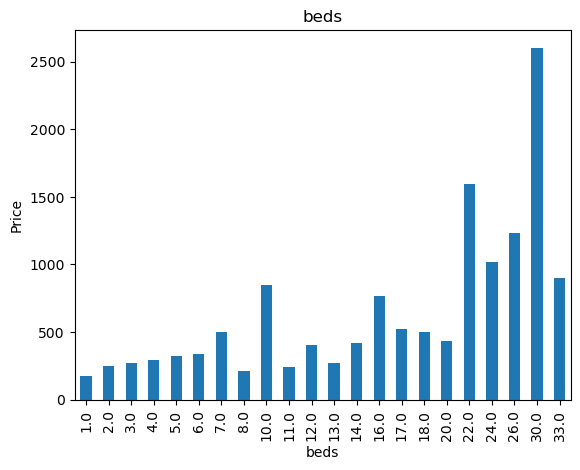

In [17]:
##  Find the realtionship between distcrete variables and Price

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

#### Continous Variables

In [18]:
continuous_feature=[feature for feature in df_num if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 14


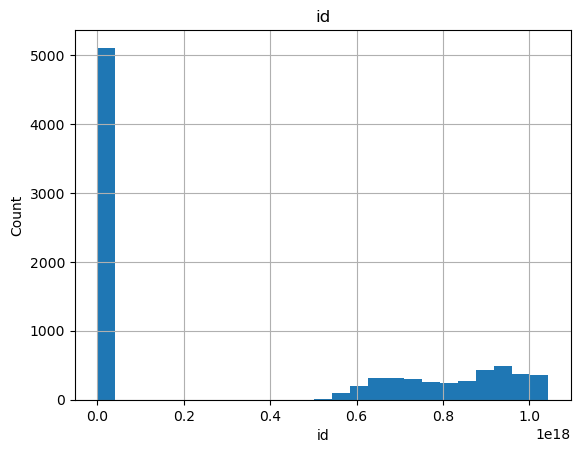

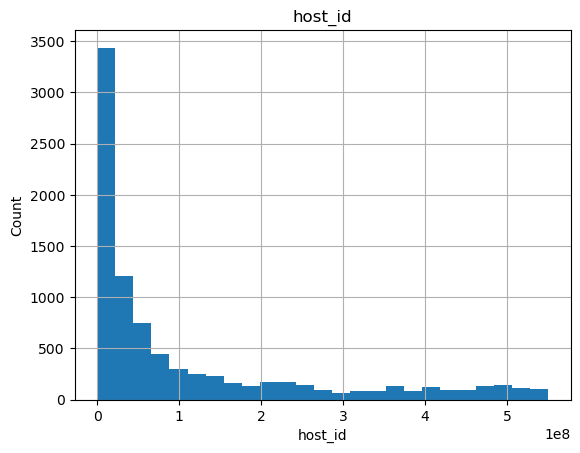

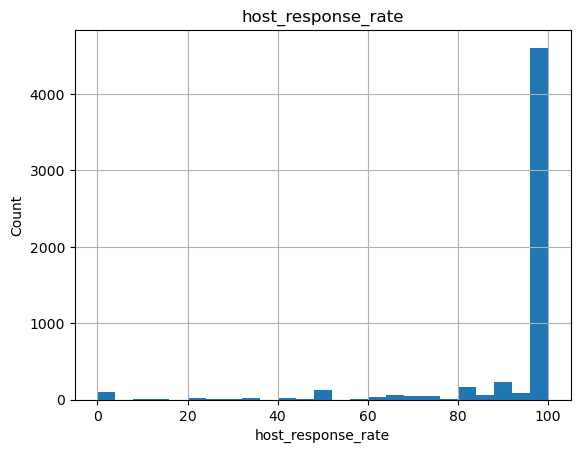

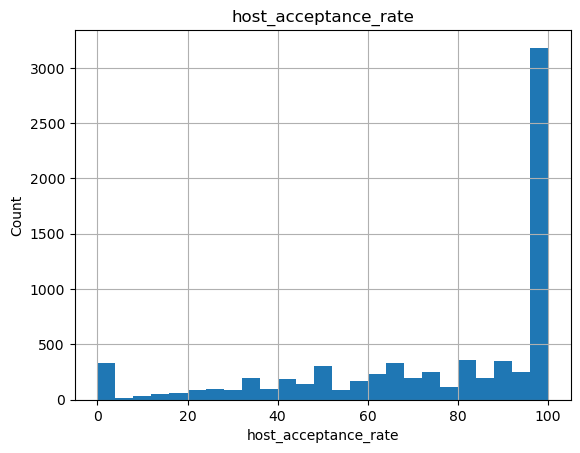

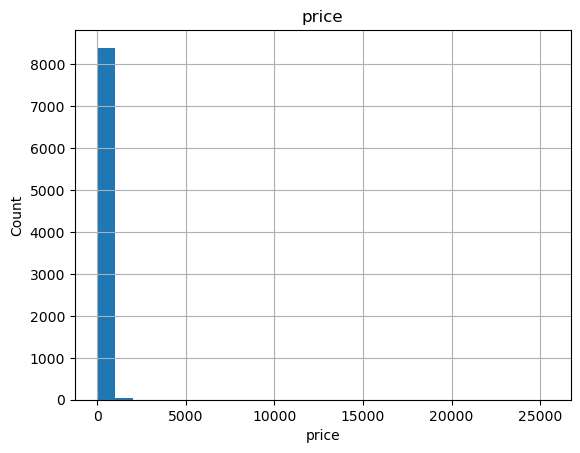

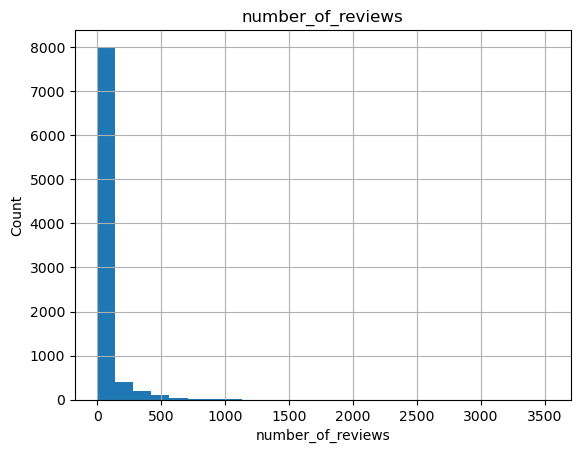

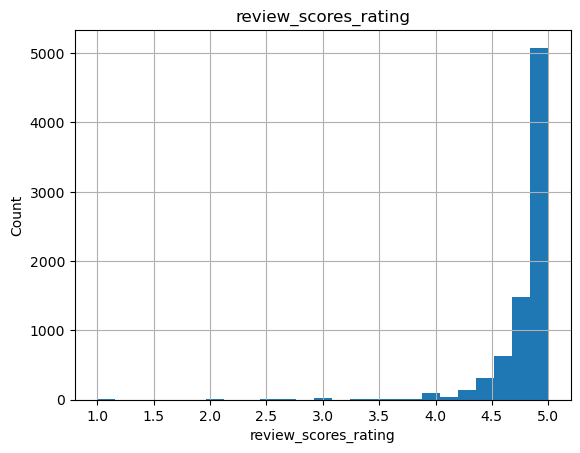

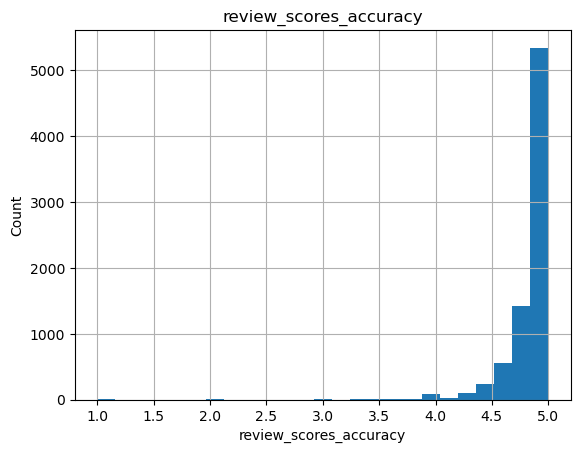

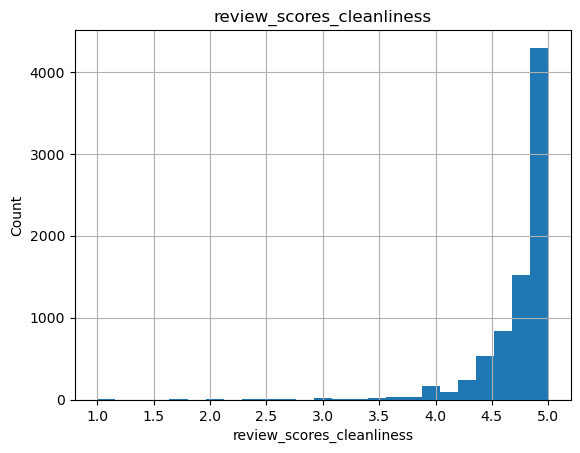

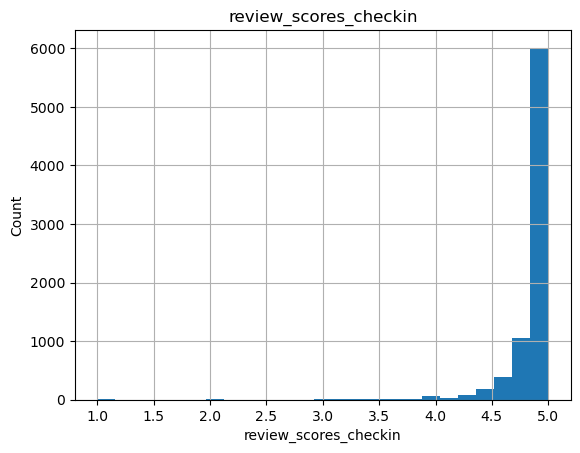

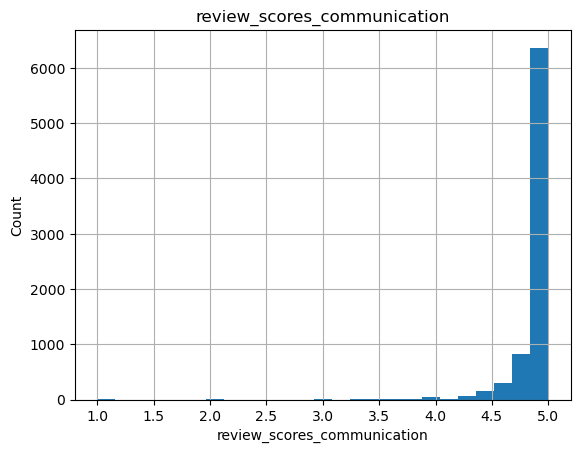

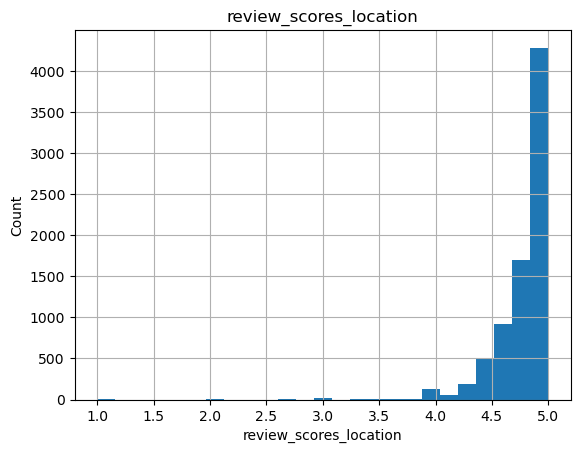

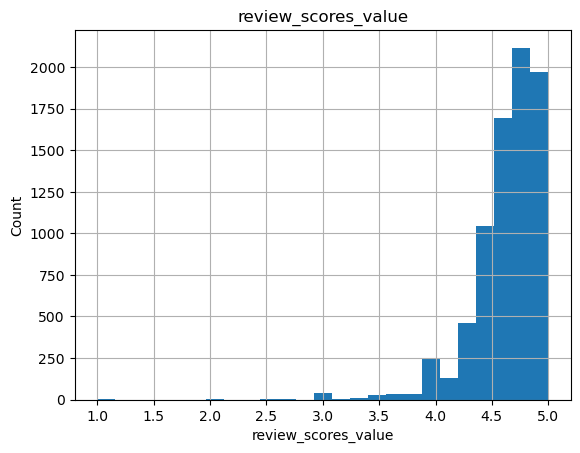

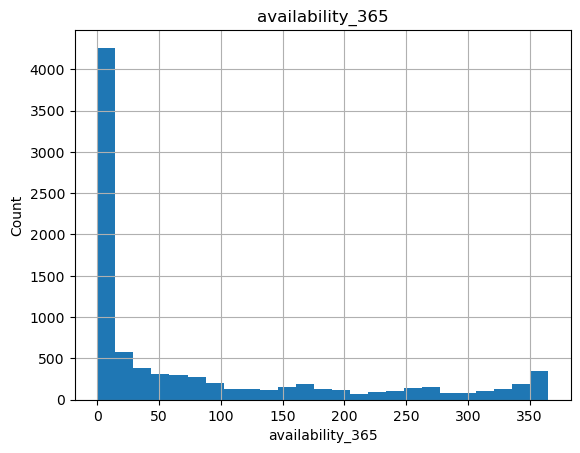

In [19]:
## analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Categorical Variables


In [20]:
df_cat = [col for col in df.columns if df[col].dtype == 'object']
df_cat

['host_name',
 'host_about',
 'host_response_time',
 'host_verifications',
 'neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bathrooms_text']

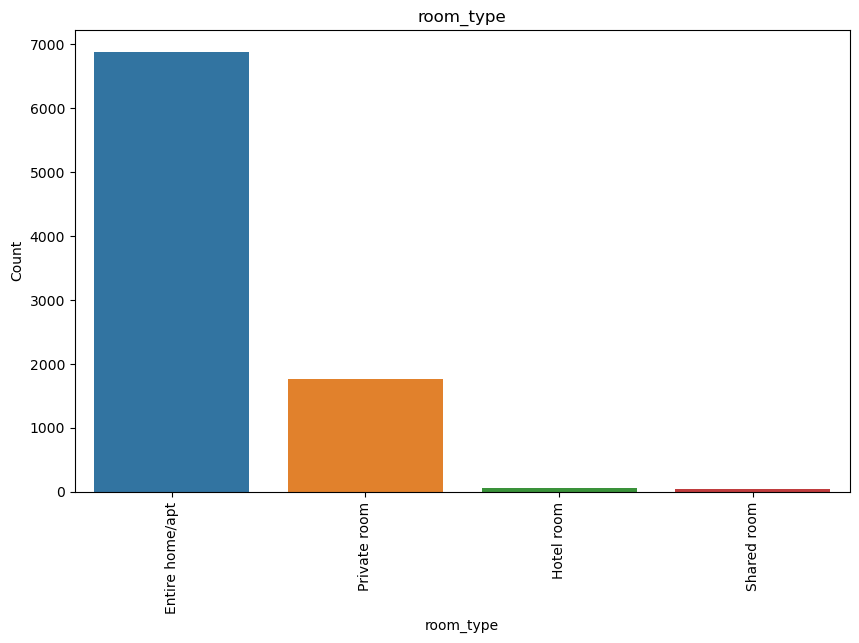

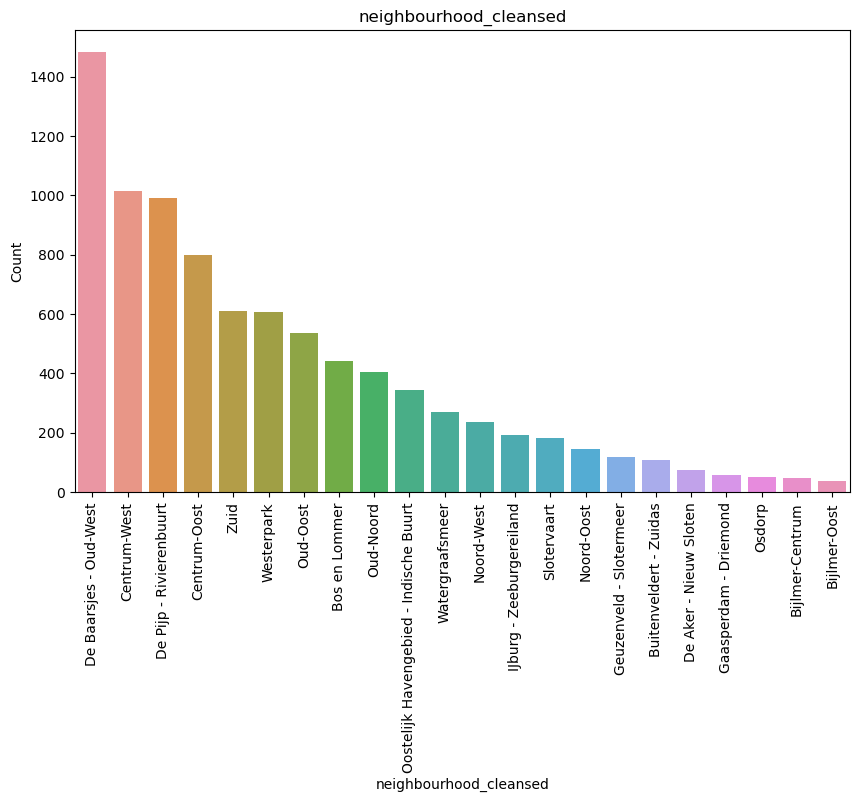

In [21]:

features = ['room_type', 'neighbourhood_cleansed']


for feature in features:
    counts = df[feature].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.show()

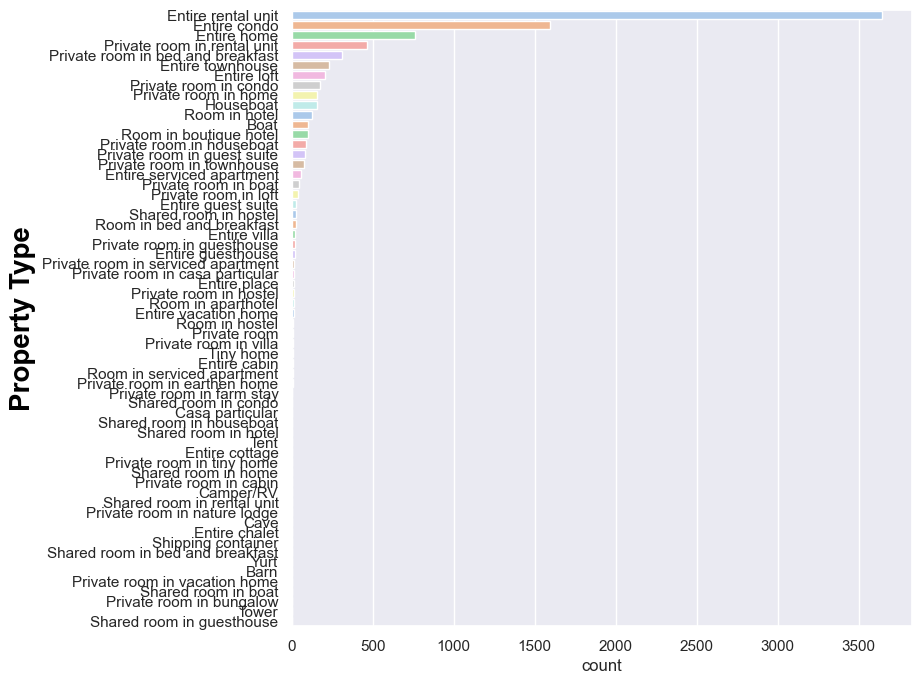

In [22]:
sns.set(style='darkgrid')
plt.figure(figsize=(8, 8))
sns.countplot(y='property_type', data=df, order=df['property_type'].value_counts().index, palette='pastel')
plt.ylabel('Property Type', fontsize=20, weight='bold', color='black')
plt.show() 

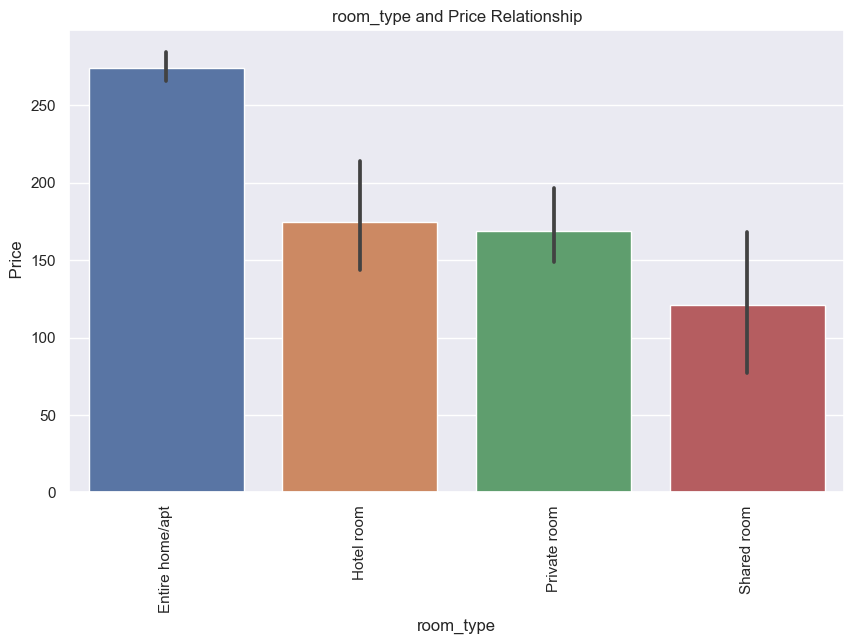

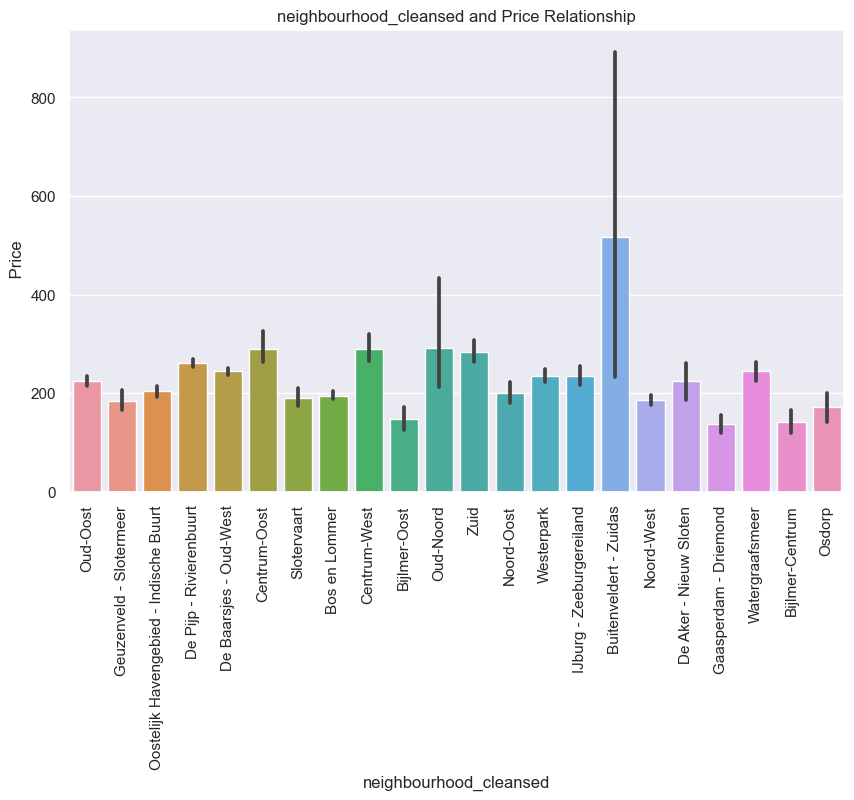

In [23]:
import seaborn as sns
features = ['room_type', 'neighbourhood_cleansed']


for feature in features:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature, y='price', data=df, estimator='mean')
    plt.title(feature + ' and Price Relationship')
    plt.xlabel(feature)
    plt.ylabel(' Price')
    plt.xticks(rotation=90)  
    plt.show()

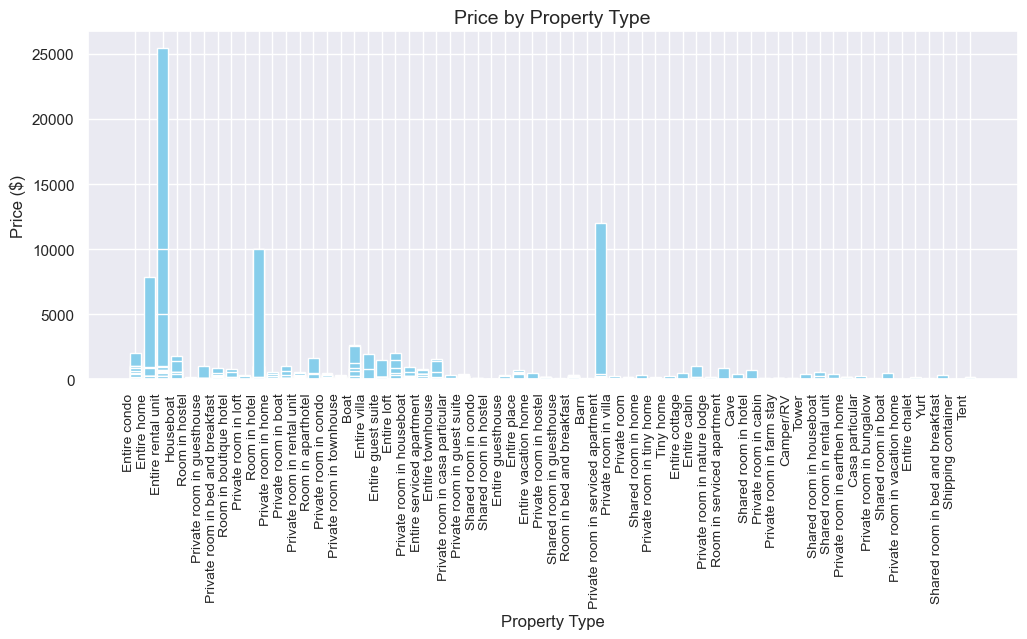

In [24]:
plt.figure(figsize=(12, 6))  
bars = plt.bar(df['property_type'], df['price'], color='skyblue')

plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price by Property Type', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)  


plt.subplots_adjust(bottom=0.3)


plt.show()

# Feature Engineering

In [25]:
useless_features= ['id', 'host_id', 'host_name', 'host_about', 'host_verifications']
df_main = df.drop(columns=[col for col in df.columns if col in useless_features])
df_main.head()

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_365
0,NaN,NaN,86.0,Oud-Oost,Entire condo,Entire home/apt,2,1,1.0,232.0,5,4.60,4.60,4.40,4.40,4.60,4.60,4.40,0
1,NaN,NaN,50.0,Geuzenveld - Slotermeer,Entire home,Entire home/apt,4,2,2.0,120.0,6,5.00,4.67,4.83,4.83,5.00,4.67,4.83,168
2,within a few hours,100.0,83.0,Oostelijk Havengebied - Indische Buurt,Entire rental unit,Entire home/apt,4,1,2.0,170.0,51,4.71,4.80,4.65,4.87,4.96,4.57,4.57,175
3,within a day,70.0,18.0,De Pijp - Rivierenbuurt,Entire rental unit,Entire home/apt,2,1,NaN,200.0,43,4.86,4.95,4.93,4.95,4.98,5.00,4.84,0
4,a few days or more,0.0,60.0,Oostelijk Havengebied - Indische Buurt,Entire home,Entire home/apt,3,1,2.0,265.0,5,5.00,5.00,5.00,5.00,5.00,5.00,4.40,91


#### Handling Missing Values

1. **Investigating the Quantity and Distribution of Missing Values:**
   - Calculate the number and percentage of missing values for each feature.
   - Analyze whether missing values are randomly distributed or follow a specific pattern.

2. **Determining the Reasons for Missing Values:**
   - Try to understand the reasons for missing values, such as data collection errors, incorrect data entry, or intentionally left blank fields.

3. **Choosing Methods to Handle Missing Values:**
   - **Delete Missing Values:** This method can be used when there are few missing values and they are randomly distributed.
   - **Impute Missing Values:** Missing values can be estimated using methods such as mean, median, hot-deck imputation, etc.
   - **Define Missing Values as a Category:** If missing values are believed to have a unique meaning, they can be defined as a new category.


In [26]:
df_main.isnull().sum()


host_response_time             3060
host_response_rate             3060
host_acceptance_rate           1362
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms_text                   29
beds                             74
price                           296
number_of_reviews                 0
review_scores_rating            914
review_scores_accuracy          914
review_scores_cleanliness       915
review_scores_checkin           914
review_scores_communication     914
review_scores_location          915
review_scores_value             915
availability_365                  0
dtype: int64

### Visualizing Impact of Missing Values on Price

Create bar charts comparing the median prices of observations containing missing values for each feature with observations that do not contain missing values. This way, you can visually see the impact of missing values on price.







In [27]:
features_with_na=[features for features in df_main.columns if df_main[features].isnull().sum()>1]
for feature in features_with_na:
    print("{}: {}% missing values".format(feature,np.round(df_main[feature].isnull().mean(),4)))

host_response_time: 0.3502% missing values
host_response_rate: 0.3502% missing values
host_acceptance_rate: 0.1559% missing values
bathrooms_text: 0.0033% missing values
beds: 0.0085% missing values
price: 0.0339% missing values
review_scores_rating: 0.1046% missing values
review_scores_accuracy: 0.1046% missing values
review_scores_cleanliness: 0.1047% missing values
review_scores_checkin: 0.1046% missing values
review_scores_communication: 0.1046% missing values
review_scores_location: 0.1047% missing values
review_scores_value: 0.1047% missing values


In [28]:
# For Categoric Variables
features_nan=[feature for feature in df_main.columns if df_main[feature].isnull().sum()>1 and df_main[feature].dtypes=='O']
def replace_cat_feature(dataset,features_nan):
    data=df_main.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

df_main=replace_cat_feature(df_main,features_nan)

df_main[features_nan].isnull().sum()

host_response_time    0
bathrooms_text        0
dtype: int64

In [29]:
# For Numarical Varibles
numerical_with_nan=[feature for feature in df_main.columns if df_main[feature].isnull().sum()>1 and df_main[feature].dtypes!='O']

for feature in numerical_with_nan:
    
    median_value=df_main[feature].median()
    
    df_main[feature].fillna(median_value,inplace=True)
    
df_main[numerical_with_nan].isnull().sum()
    

host_response_rate             0
host_acceptance_rate           0
beds                           0
price                          0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [30]:
df_main.isnull().sum()

host_response_time             0
host_response_rate             0
host_acceptance_rate           0
neighbourhood_cleansed         0
property_type                  0
room_type                      0
accommodates                   0
bathrooms_text                 0
beds                           0
price                          0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
availability_365               0
dtype: int64

In [31]:
df_main.dtypes

host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
neighbourhood_cleansed          object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms_text                  object
beds                           float64
price                          float64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
availability_365                 int64
dtype: object

### Encoding Categorical Variables using Label Encoder

The provided code segment demonstrates how to use the `LabelEncoder` from `sklearn.preprocessing` to encode categorical variables in a DataFrame (`df_main`).


In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df_main.columns:
    if df_main[column].dtype == 'object': 
        df_main[column] = label_encoder.fit_transform(df_main[column])

In [49]:
df_main

,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_365
0,0,100.0,86.0,17,7,0,2,1,1.0,232.0,5,4.60,4.60,4.40,4.40,4.60,4.60,4.40,0
1,0,100.0,50.0,10,11,0,4,3,2.0,120.0,6,5.00,4.67,4.83,4.83,5.00,4.67,4.83,168
2,3,100.0,83.0,14,14,0,4,1,2.0,170.0,51,4.71,4.80,4.65,4.87,4.96,4.57,4.57,175
3,2,70.0,18.0,8,14,0,2,1,1.0,200.0,43,4.86,4.95,4.93,4.95,4.98,5.00,4.84,0
4,1,0.0,60.0,14,11,0,3,1,2.0,265.0,5,5.00,5.00,5.00,5.00,5.00,5.00,4.40,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,4,100.0,86.0,4,14,0,4,1,2.0,500.0,7,5.00,5.00,5.00,5.00,5.00,5.00,4.88,15
8735,3,90.0,81.0,7,19,0,4,1,2.0,400.0,7,4.88,5.00,4.88,5.00,5.00,4.88,3.88,16
8736,2,78.0,100.0,16,14,0,5,1,2.0,270.0,2,5.00,5.00,5.00,4.67,4.67,4.33,4.33,263
8737,3,100.0,82.0,8,14,0,2,1,1.0,275.0,6,4.86,5.00,5.00,5.00,5.00,5.00,4.86,232


#### Feature Scaling
######  Scaling Features using Min-Max Scaler

The provided code snippet demonstrates how to scale features in a DataFrame (`df_main`) using Min-Max scaling with `MinMaxScaler` from `sklearn.preprocessing`.


In [54]:
feature_scale=[feature for feature in df_main.columns if feature not in ['price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_main[feature_scale])

MinMaxScaler()

In [56]:
scaler.transform(df_main[feature_scale])

array([[0.        , 1.        , 0.86      , ..., 0.9       , 0.85      ,
        0.        ],
       [0.        , 1.        , 0.5       , ..., 0.9175    , 0.9575    ,
        0.46027397],
       [0.75      , 1.        , 0.83      , ..., 0.8925    , 0.8925    ,
        0.47945205],
       ...,
       [0.5       , 0.78      , 1.        , ..., 0.8325    , 0.8325    ,
        0.72054795],
       [0.75      , 1.        , 0.82      , ..., 1.        , 0.965     ,
        0.63561644],
       [1.        , 1.        , 0.8       , ..., 1.        , 0.8125    ,
        0.71506849]])

In [58]:
df_main = pd.concat([df_main[['price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df_main[feature_scale]), columns=feature_scale)],
                    axis=1)
df_main

,price,host_response_time,host_response_rate,host_acceptance_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,beds,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_365
0,232.0,0.0000,0.0100,0.0086,0.038549,0.001881,0.0,-0.062222,0.015625,-0.031250,4.017102e-07,-0.025000,-0.025000,-0.037500,-0.037500,-0.025000,-0.025000,-0.037500,0.000000
1,120.0,0.0000,0.0100,0.0050,0.022676,0.002956,0.0,-0.053333,0.046875,-0.030273,4.820522e-07,0.000000,-0.020625,-0.010625,-0.010625,0.000000,-0.020625,-0.010625,0.001261
2,170.0,0.1875,0.0100,0.0083,0.031746,0.003762,0.0,-0.053333,0.015625,-0.030273,4.097444e-06,-0.018125,-0.012500,-0.021875,-0.008125,-0.002500,-0.026875,-0.026875,0.001314
3,200.0,0.1250,0.0070,0.0018,0.018141,0.003762,0.0,-0.062222,0.015625,-0.031250,3.454708e-06,-0.008750,-0.003125,-0.004375,-0.003125,-0.001250,0.000000,-0.010000,0.000000
4,265.0,0.0625,0.0000,0.0060,0.031746,0.002956,0.0,-0.057778,0.015625,-0.030273,4.017102e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.037500,0.000683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8734,500.0,0.2500,0.0100,0.0086,0.009070,0.003762,0.0,-0.053333,0.015625,-0.030273,5.623943e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007500,0.000113
8735,400.0,0.1875,0.0090,0.0081,0.015873,0.005106,0.0,-0.053333,0.015625,-0.030273,5.623943e-07,-0.007500,0.000000,-0.007500,0.000000,0.000000,-0.007500,-0.070000,0.000120
8736,270.0,0.1250,0.0078,0.0100,0.036281,0.003762,0.0,-0.048889,0.015625,-0.030273,1.606841e-07,0.000000,0.000000,0.000000,-0.020625,-0.020625,-0.041875,-0.041875,0.001974
8737,275.0,0.1875,0.0100,0.0082,0.018141,0.003762,0.0,-0.062222,0.015625,-0.031250,4.820522e-07,-0.008750,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008750,0.001741


In [59]:
y = df_main["price"]
X = df_main.drop(columns=["price"])

# Train Model

### Brief Information About Algorithms

**Linear Regression:**
Linear regression is a simple regression model that attempts to predict a target variable using a linear combination of input features. It is used to model relationships that can be expressed with straight lines.

**XGBoost (eXtreme Gradient Boosting):**
XGBoost is an enhanced version of Gradient Boosting, which is a tree-based algorithm. It has achieved success in many data science competitions and has become popular. It can be used for regression and classification problems. One of the main advantages of XGBoost is its ability to better model complex relationships and interactions.

**Why Choose These Algorithms:**

- **Linear Regression:** We choose linear regression for its simplicity and interpretability. It works well when there is a linear relationship between features and the target variable, making it a good starting point for regression tasks.
  
- **XGBoost:** XGBoost is chosen for its excellent performance in handling complex relationships and high-dimensional datasets. It is particularly effective in capturing non-linear relationships and interactions between features, making it a powerful choice for regression and classification tasks in diverse datasets.

These algorithms are selected based on their strengths and suitability for different types of relationships and data complexities encountered in predictive modeling tasks.


In [73]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

model_xgb = XGBRegressor(objective='reg:squarederror')
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


# Evaluating Model Performance: Mean Squared Error (MSE)

To assess the performance of a regression model, the Mean Squared Error (MSE) metric is commonly utilized. MSE quantifies the average squared difference between predicted values and actual values. Lower MSE values indicate superior model performance.

The formula to compute MSE is as follows:

MSE = (1/n) * Σ (yᵢ - ŷᵢ)²

Here:
- \( n \) represents the number of samples
- \( y_i \) denotes the actual target value for the \( i \)th sample
- \( \hat{y}_i \) signifies the predicted target value for the \( i \)th sample

Once you have obtained the predicted values from your regression model and have the corresponding actual target values, you can use the above formula to calculate the MSE and gauge the model's accuracy.




In [77]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 37722.158056207634


In [78]:
y_pred_xgb = model_xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error:", mse)

Mean Squared Error: 357413.7926819367
